<a id='table_of_contents'></a>

0. [Import libraries](#imports)
1. [Import data](#imports_data)
2. [Data exploration](#data_exploration)
3. [Data cleaning](#data_cleaning)
4. [Data preparation](#data_preparation)
5. [Benchmark model](#benchmark_model)<br>
6. [Feature engineering](#feature_engineering)
7. [Train model](#train_model) <br>
    7.1. [Decision tree](#decision_tree) <br>
    7.2. [Random forest](#random_forest) <br>
    7.3. [Gradient booster](#gradient_booster)
8. [Tuning](#tune) <br>
    8.1. [Finding best parameters](#find_best_p)

# 0. Import libraries <a id='imports'></a>
[Back to top](#table_of_contents)

In [280]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 1. Import data <a id='imports_data'></a>
[Back to top](#table_of_contents)

In [281]:
taxi_jan_2024 = pd.read_parquet(r'C:\Users\danie\Machine_Learning\datasets\yellow_tripdata_2024-01.parquet')
taxi_data = pd.concat([taxi_jan_2024])
taxi_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


# 2. Data exploration <a id='data_exploration'></a>
[Back to top](#table_of_contents)

In [282]:
taxi_data.shape

(2964624, 19)

In [283]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [284]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',  'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type',  'total_amount']]
taxi_data[taxi_data['passenger_count'].isna()].shape

(140162, 9)

In [285]:
taxi_data[taxi_data['payment_type'] == 0].shape

(140162, 9)

In [286]:
taxi_data = taxi_data[taxi_data['payment_type'] != 0]
taxi_data['passenger_count'].isna().sum()

0

In [287]:
taxi_data.shape

(2824462, 9)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

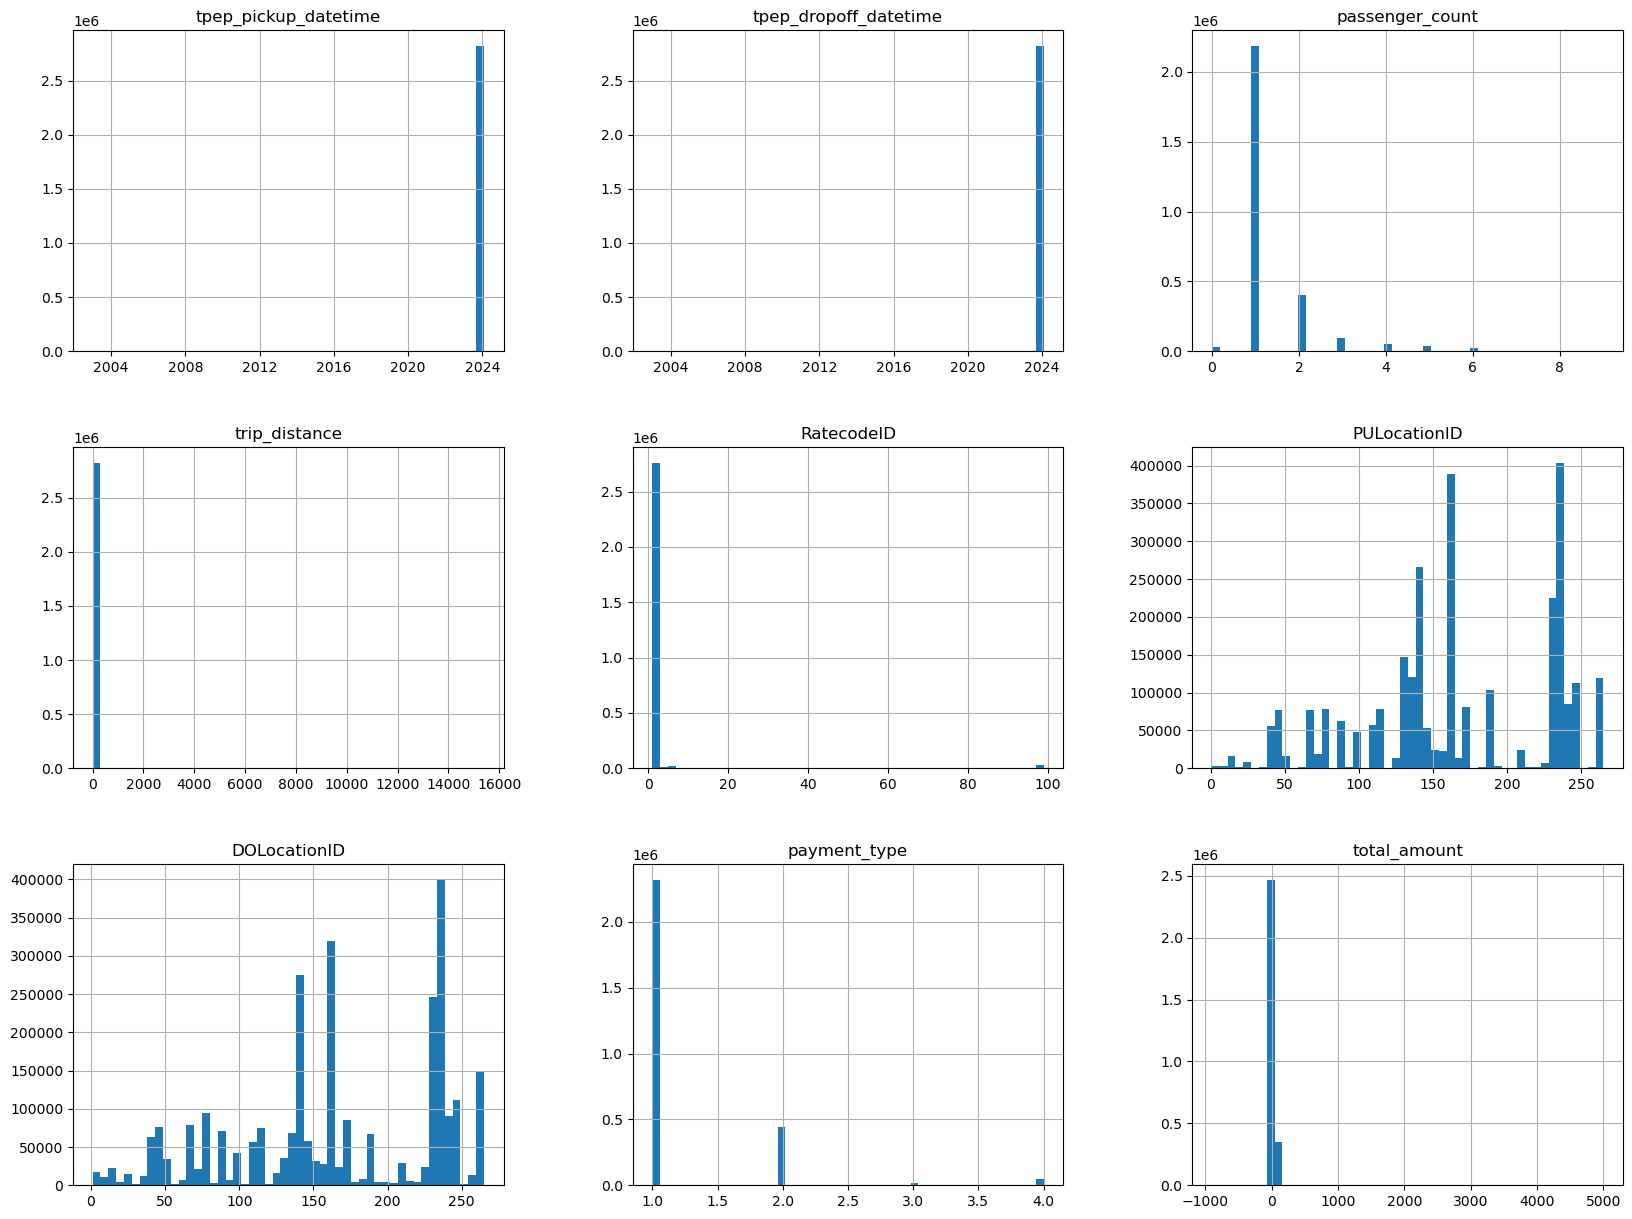

In [288]:
taxi_data.hist(bins=50, figsize=(20,15))

# 3. Data cleaning <a id='data_cleaning'></a>
[Back to top](#table_of_contents)

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

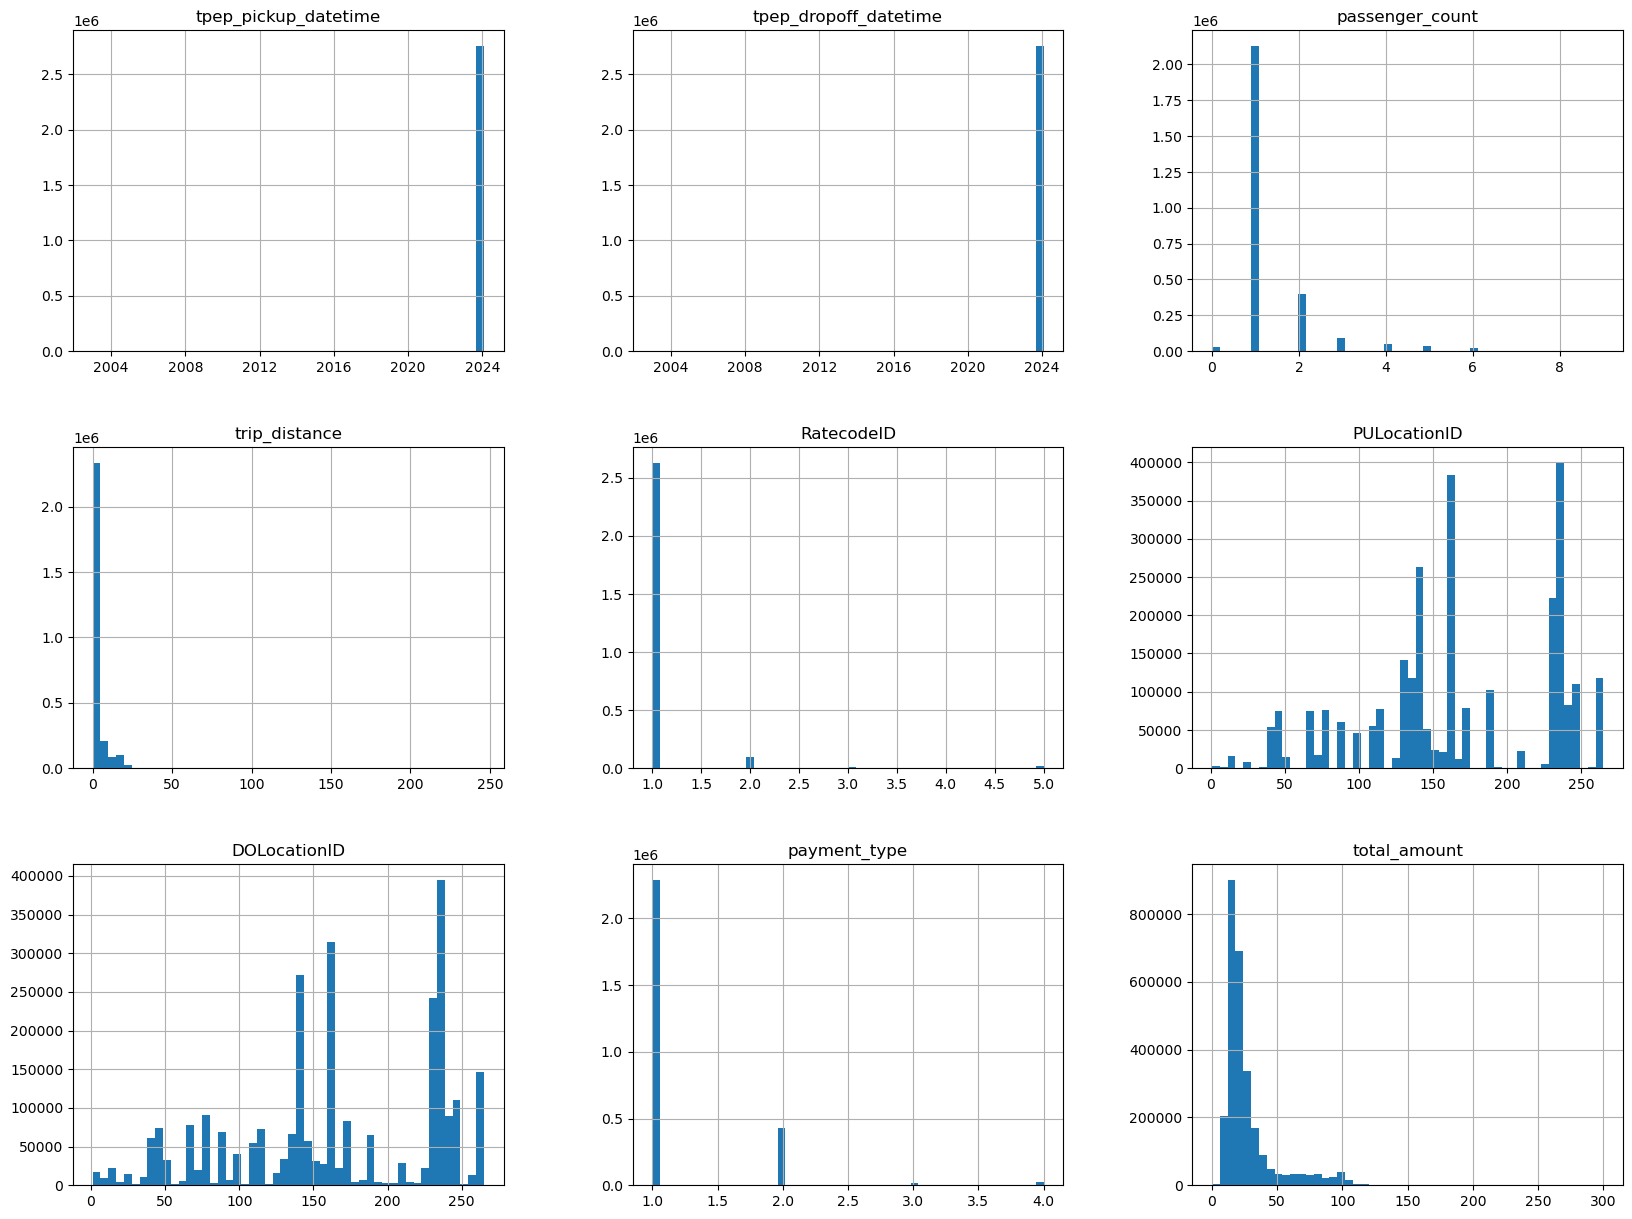

In [289]:
taxi_data_filtered = taxi_data[(taxi_data['trip_distance'] < 250) & (taxi_data['total_amount'] > 0) & (taxi_data['total_amount'] < 300) & (taxi_data['RatecodeID']<6)]
taxi_data_filtered.hist(bins=50, figsize=(20,15))

In [290]:
taxi_data_filtered.shape

(2759395, 9)

In [291]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64

In [292]:
taxi_data_prepared = taxi_data_filtered.copy()
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
total_amount                    float64
dtype: object

In [293]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10


# 4. Data preparation <a id='data_preparation'></a>
[Back to top](#table_of_contents)

In [294]:
taxi_data_prepared['transaction_date'] = taxi_data_prepared['tpep_pickup_datetime'].dt.date
taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,186,79,2,22.70,2024-01-01,2024,1,1,0
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,140,236,1,18.75,2024-01-01,2024,1,1,0
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,236,79,1,31.30,2024-01-01,2024,1,1,0
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,79,211,1,17.00,2024-01-01,2024,1,1,0
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,211,148,1,16.10,2024-01-01,2024,1,1,0


In [295]:
taxi_data_prepared[taxi_data_prepared['transaction_year'] != 2024].shape

(14, 14)

In [296]:
taxi_data_prepared[taxi_data_prepared['transaction_year'] != 2024]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
256,2023-12-31 23:56:46,2024-01-01 00:12:06,2.0,2.38,1.0,236,142,1,21.60,2023-12-31,2023,12,31,23
369,2023-12-31 23:39:17,2023-12-31 23:42:00,2.0,0.47,1.0,90,68,1,10.10,2023-12-31,2023,12,31,23
753,2023-12-31 23:41:02,2023-12-31 23:48:03,1.0,0.40,1.0,246,246,2,12.20,2023-12-31,2023,12,31,23
2210,2023-12-31 23:57:17,2024-01-01 00:01:50,1.0,0.53,1.0,144,211,1,12.96,2023-12-31,2023,12,31,23
2615,2023-12-31 23:56:45,2024-01-01 00:00:28,1.0,0.97,1.0,163,237,1,13.50,2023-12-31,2023,12,31,23
2985,2023-12-31 23:49:12,2024-01-01 00:04:32,1.0,3.14,1.0,234,237,1,28.60,2023-12-31,2023,12,31,23
3176,2023-12-31 23:47:28,2023-12-31 23:57:07,2.0,1.44,1.0,68,137,1,18.84,2023-12-31,2023,12,31,23
4137,2023-12-31 23:58:35,2024-01-01 00:13:06,6.0,8.39,1.0,138,217,2,42.35,2023-12-31,2023,12,31,23
4142,2023-12-31 23:58:37,2024-01-01 00:08:37,2.0,0.59,1.0,161,170,1,18.75,2023-12-31,2023,12,31,23
8628,2023-12-31 23:54:27,2024-01-01 00:13:12,1.0,7.70,1.0,229,244,1,45.72,2023-12-31,2023,12,31,23


In [297]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year'] == 2024]

In [298]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [299]:
main_taxi_data = taxi_data_prepared[all_needed_columns]
main_taxi_data.head()

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,0,1.72,22.70
1,140,2024-01-01,1,0,1.80,18.75
2,236,2024-01-01,1,0,4.70,31.30
3,79,2024-01-01,1,0,1.40,17.00
4,211,2024-01-01,1,0,0.80,16.10


In [300]:
taxi_grouped_by_region = main_taxi_data.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_data.groupby(categorical_columns).count().reset_index()['total_amount']
taxi_grouped_by_region


,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,15,0.000000,145.620000,2
...,...,...,...,...,...,...,...
58995,265,2024-01-31,31,17,2.800000,148.625000,4
58996,265,2024-01-31,31,18,0.000000,201.000000,1
58997,265,2024-01-31,31,19,2.880000,164.985000,2
58998,265,2024-01-31,31,20,0.025000,124.000000,2


# 5. Benchmark model <a id='benchmark_model'></a>
[Back to top](#table_of_contents)

In [301]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [302]:
input_features = ['PULocationID', 'transaction_day', 'transaction_hour', 'trip_distance']
target_feature = ['total_amount']

### 5.1. Train-test split

In [303]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features]
y_bench = data_for_benchmark_model[target_feature]

# One hot encoding, this line would be needed if we had categorical data
#X_bench = pd.get_dummies(X_bench)

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

### 5.2. Fit a model(DecisionTree) to the data

In [304]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_bench, y_train_bench)

DecisionTreeRegressor(max_depth=10)

### 5.3. Model evaluation

In [305]:
y_pred_bench = tree.predict(X_test_bench)

import sklearn.metrics as metrics

print(f'mean absolute error: {metrics.mean_absolute_error(y_test_bench, y_pred_bench)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test_bench, y_pred_bench)}')
print(f'r2 score: {metrics.r2_score(y_test_bench, y_pred_bench)}')

mean absolute error: 6.278998442471039
mean squared error: 203.36749142689487
r2 score: 0.6105681088638648


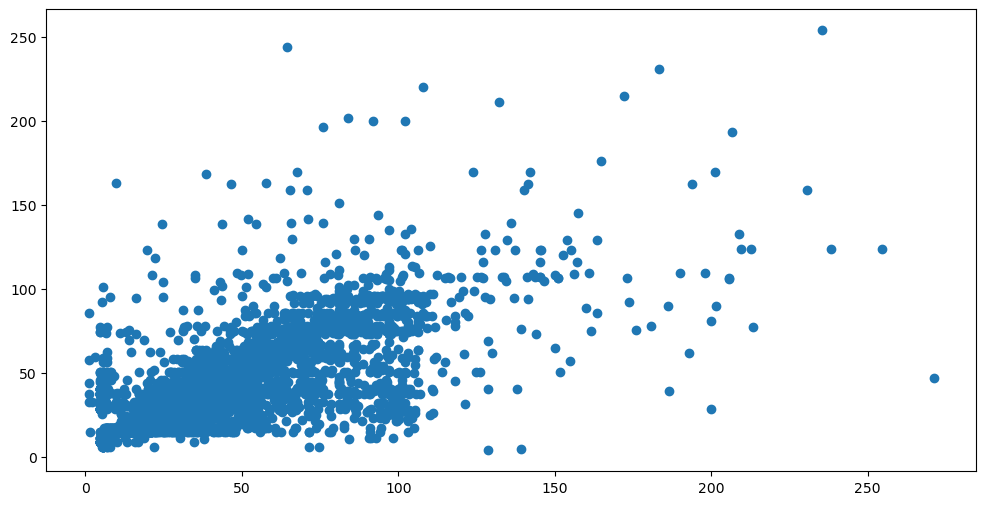

In [306]:
ax, figure = plt.subplots(figsize=(12, 6))
plt.scatter(y_test_bench, y_pred_bench) 
plt.show()

Could this be too good to be true?

### 5.4. Fixing problems
The problem is that trip_distance depends on total_amount, creating a strong correlation in the results. Moreover, this is not a value that the company would typically have beforehand

In [307]:
input_features = ['PULocationID', 'transaction_day', 'transaction_hour']
target_feature = ['total_amount']

from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features]
y_bench = data_for_benchmark_model[target_feature]

# One hot encoding, this line would be needed if we had categorical data
#X_bench = pd.get_dummies(X_bench)

X_train_bench, X_test_bench, y_train_bench, y_test_bench = train_test_split(X_bench, y_bench, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train_bench, y_train_bench)

y_pred_bench = tree.predict(X_test_bench)

import sklearn.metrics as metrics

print(f'mean absolute error: {metrics.mean_absolute_error(y_test_bench, y_pred_bench)}')
print(f'mean squared error: {metrics.mean_squared_error(y_test_bench, y_pred_bench)}')
print(f'r2 score: {metrics.r2_score(y_test_bench, y_pred_bench)}')

mean absolute error: 9.75868691733723
mean squared error: 336.43199202865907
r2 score: 0.355760618498286


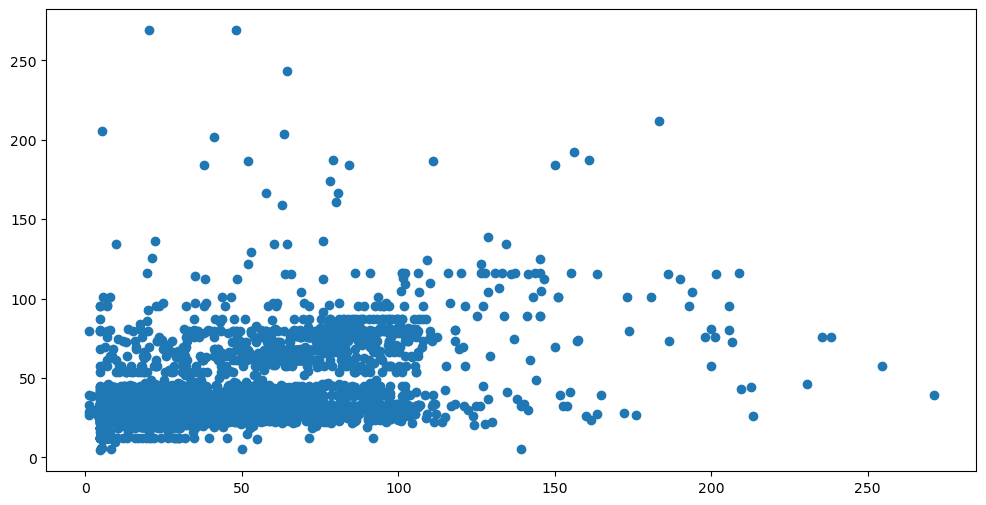

In [308]:
ax, figure = plt.subplots(figsize=(12, 6))
plt.scatter(y_test_bench, y_pred_bench) 
plt.show()

# 6. Feature Engineering <a id='feature_engineering'></a>
[Back to top](#table_of_contents)

In [309]:
data_with_new_features = taxi_grouped_by_region.copy()
data_with_new_features.dtypes

PULocationID               int32
transaction_date          object
transaction_day            int32
transaction_hour           int32
trip_distance            float64
total_amount             float64
count_of_transactions      int64
dtype: object

**Data-related features** 

In [310]:
data_with_new_features['transaction_date'] = pd.to_datetime(data_with_new_features.loc[:, 'transaction_date'])
data_with_new_features.dtypes

PULocationID                      int32
transaction_date         datetime64[ns]
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
dtype: object

In [311]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['transaction_week_day'].value_counts()

transaction_week_day
0    9431
2    9412
1    9209
6    7814
5    7804
4    7712
3    7618
Name: count, dtype: int64

In [312]:
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x>= 5 else False)
data_with_new_features['weekend'].value_counts()

weekend
False    43382
True     15618
Name: count, dtype: int64

In [313]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=2022).date
holidays = pd.to_datetime(holidays)

data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

In [314]:
data_with_new_features

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2024-01-01,1,5,0.000000,109.200000,1,0,False,True
1,1,2024-01-01,1,6,0.020000,76.000000,3,0,False,True
2,1,2024-01-01,1,13,0.000000,108.983333,3,0,False,True
3,1,2024-01-01,1,14,0.001667,85.680000,6,0,False,True
4,1,2024-01-01,1,15,0.000000,145.620000,2,0,False,True
...,...,...,...,...,...,...,...,...,...,...
58995,265,2024-01-31,31,17,2.800000,148.625000,4,2,False,False
58996,265,2024-01-31,31,18,0.000000,201.000000,1,2,False,False
58997,265,2024-01-31,31,19,2.880000,164.985000,2,2,False,False
58998,265,2024-01-31,31,20,0.025000,124.000000,2,2,False,False


In [315]:
data_with_new_features['weekend'] = data_with_new_features['weekend'].apply(lambda x: 1 if x else 0)
data_with_new_features['is_holiday'] = data_with_new_features['is_holiday'].apply(lambda x: 1 if x else 0)
data_with_new_features

,PULocationID,transaction_date,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2024-01-01,1,5,0.000000,109.200000,1,0,0,1
1,1,2024-01-01,1,6,0.020000,76.000000,3,0,0,1
2,1,2024-01-01,1,13,0.000000,108.983333,3,0,0,1
3,1,2024-01-01,1,14,0.001667,85.680000,6,0,0,1
4,1,2024-01-01,1,15,0.000000,145.620000,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...
58995,265,2024-01-31,31,17,2.800000,148.625000,4,2,0,0
58996,265,2024-01-31,31,18,0.000000,201.000000,1,2,0,0
58997,265,2024-01-31,31,19,2.880000,164.985000,2,2,0,0
58998,265,2024-01-31,31,20,0.025000,124.000000,2,2,0,0


# 7. Train Models <a id='train_model'></a>
[Back to top](#table_of_contents)

In [316]:
data_for_model = data_with_new_features.copy()

In [317]:
input_features = ['PULocationID', 'transaction_day', 'transaction_hour', 'weekend', 'is_holiday']
target_feature = ['total_amount']

**Train-test split**

In [318]:
from sklearn.model_selection import train_test_split

x = data_for_model[input_features]
y = data_for_model[target_feature]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 7.1. Decision Tree <a id='decision_tree'></a>

In [319]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [320]:
y_pred = decision_tree.predict(X_test)

import sklearn.metrics as sm

print('mean_absolute_error', sm.mean_absolute_error(y_test, y_pred))
print('mean_squared_error', sm.mean_squared_error(y_test, y_pred))
print('r2', sm.r2_score(y_test, y_pred))

mean_absolute_error 9.726645041002547
mean_squared_error 331.27705981636575
r2 0.3656318864478816


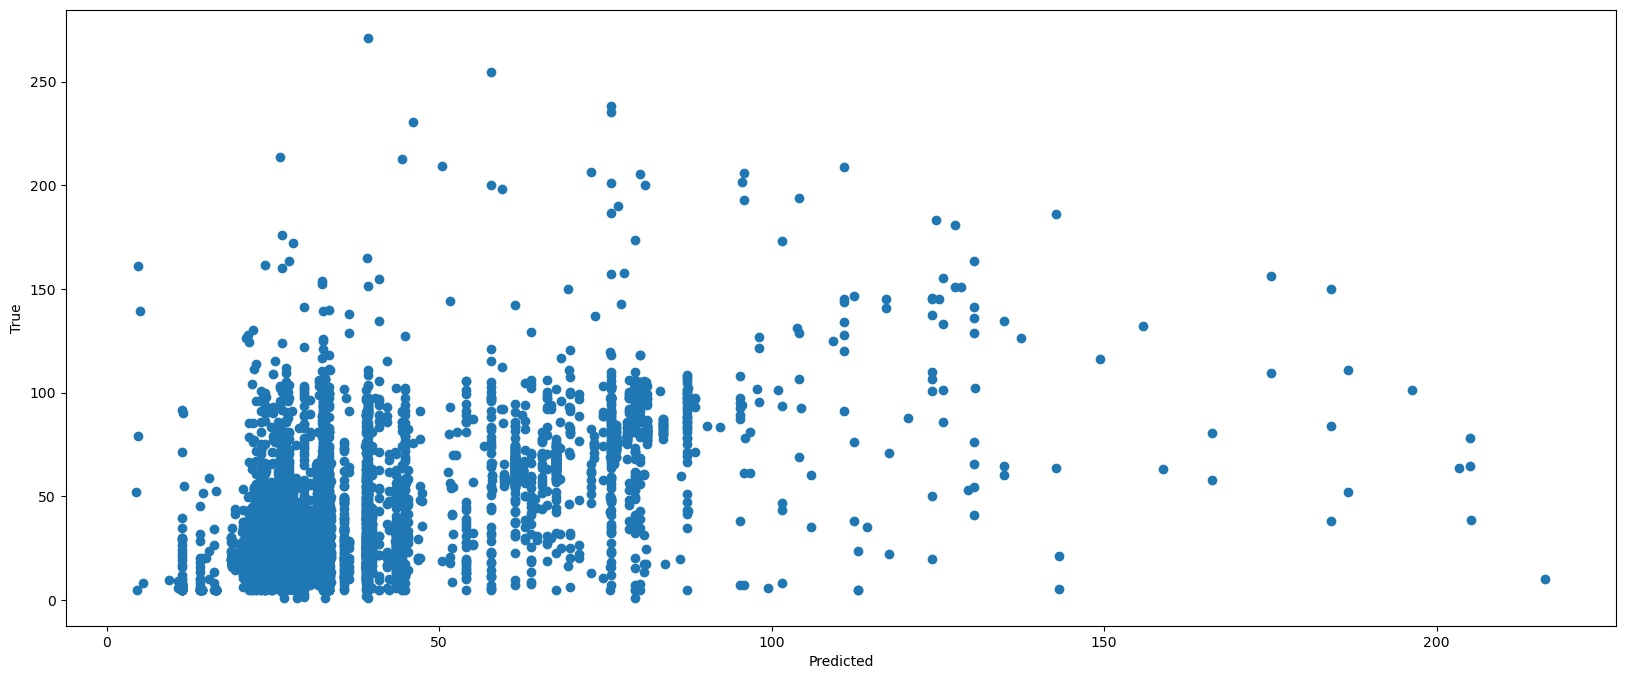

In [321]:
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_pred, y_test)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

## 7.2. Random Forest <a id='random_forest'></a>

In [322]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train.values.ravel())

RandomForestRegressor()

In [323]:
y_pred = forest.predict(X_test)

print('mean_absolute_error', sm.mean_absolute_error(y_test, y_pred))
print('mean_squared_error', sm.mean_squared_error(y_test, y_pred))
print('r2', sm.r2_score(y_test, y_pred))

mean_absolute_error 9.52903312447116
mean_squared_error 333.7134100760395
r2 0.3609664776235031


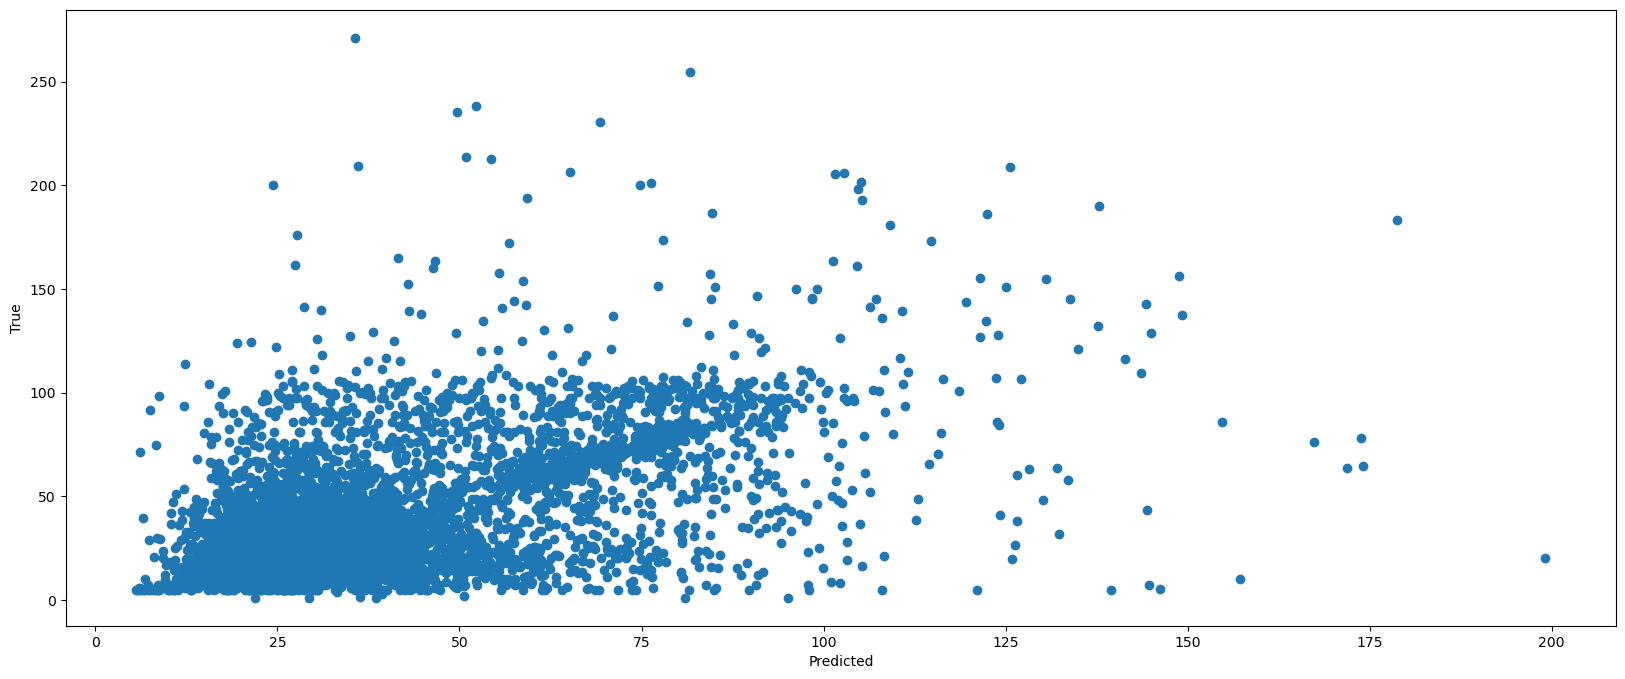

In [324]:
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_pred, y_test)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

## 7.3. Gradient Booster <a id='gradient_booster'></a>

In [325]:
from sklearn.ensemble import GradientBoostingRegressor

gradient = GradientBoostingRegressor()
gradient.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [326]:
y_pred = gradient.predict(X_test)

print('mean_absolute_error', sm.mean_absolute_error(y_test, y_pred))
print('mean_squared_error', sm.mean_squared_error(y_test, y_pred))
print('r2', sm.r2_score(y_test, y_pred))

mean_absolute_error 10.50353353831144
mean_squared_error 316.2194537315469
r2 0.3944659541371215


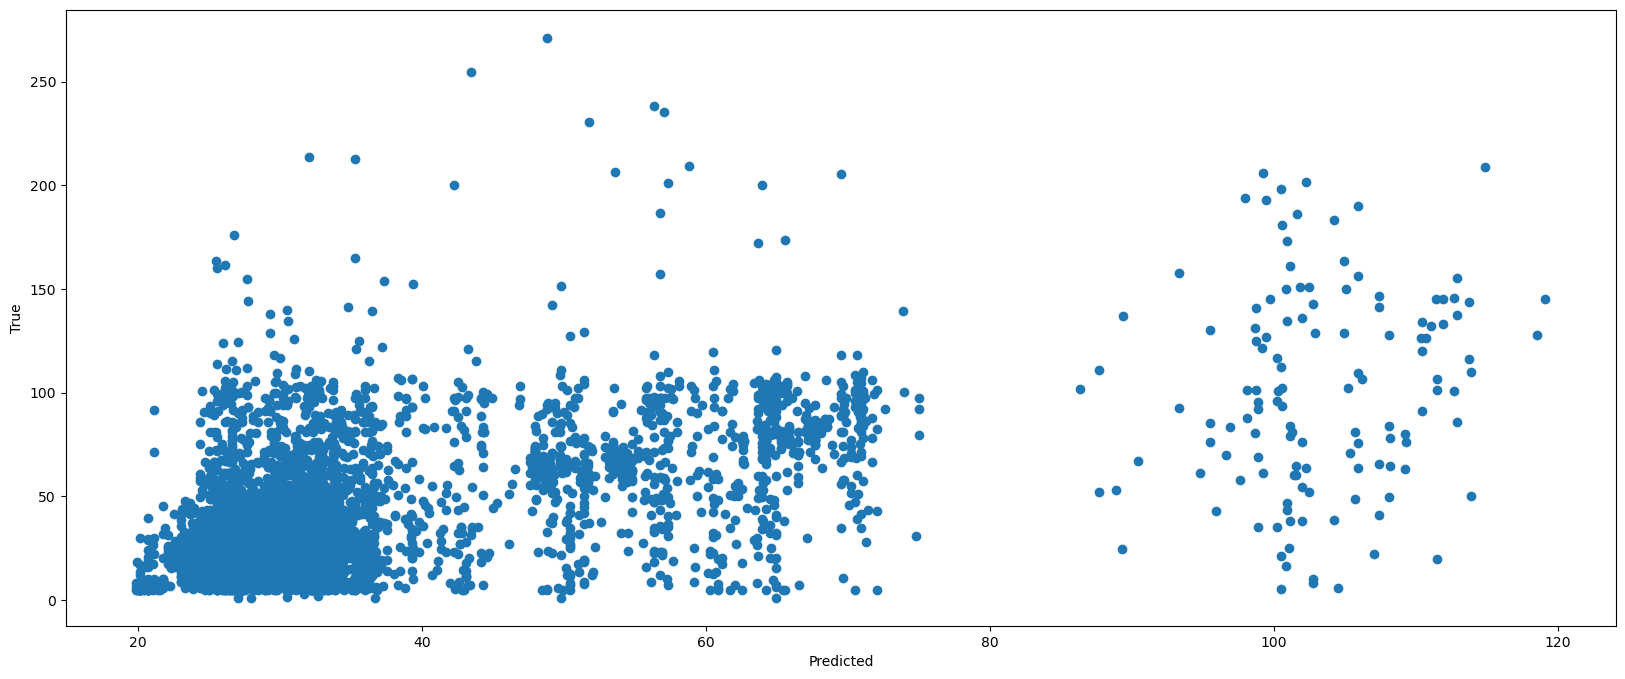

In [327]:
figure, ax = plt.subplots(figsize=(20,8))
ax.scatter(y_pred, y_test)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

# 8. Tuning <a id='tune'></a>
[Back to top](#table_of_contents)

## 8.1 Finding best parameters <a id='find_best_p'></a>


In [342]:
# Number of trees in the forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [10, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8, 16, 32]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [346]:
import pprint as pp

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf, 
               'bootstrap': bootstrap
               }
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 4, 8, 16, 32],
 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}


In [347]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30, cv = 3, verbose = 2, random_state=42)

rf_random.fit(X_train, y_train.values.ravel())

performances = pd.DataFrame.from_dict(rf_random.cv_results_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=  12.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=  12.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=700; total time=  12.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=900; total time=  17.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=900; total time=  16.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=900; total time=  17.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=8, n_estimator

In [361]:
performances[performances['rank_test_score'] < 10]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,11.254238,0.018818,1.113389,0.023650,700,4,4,sqrt,20,False,"{'n_estimators': 700, 'min_samples_split': 4, ...",0.357598,0.342712,0.349457,0.349922,0.006086,9
11,4.336510,0.111307,0.447714,0.001918,300,16,10,sqrt,None,False,"{'n_estimators': 300, 'min_samples_split': 16,...",0.368609,0.341141,0.352262,0.354004,0.011281,5
13,4.646849,0.100992,0.479914,0.001834,300,16,4,sqrt,None,False,"{'n_estimators': 300, 'min_samples_split': 16,...",0.370842,0.350881,0.365068,0.362264,0.008387,2
17,9.326129,0.125478,1.308688,0.013298,800,2,4,sqrt,None,True,"{'n_estimators': 800, 'min_samples_split': 2, ...",0.371008,0.354127,0.362085,0.362407,0.006895,1
20,13.264486,0.152977,1.333319,0.035064,1000,32,10,sqrt,20,False,"{'n_estimators': 1000, 'min_samples_split': 32...",0.363140,0.342866,0.353106,0.353037,0.008277,6
21,14.455390,0.184645,1.437049,0.042918,900,8,4,sqrt,20,False,"{'n_estimators': 900, 'min_samples_split': 8, ...",0.360794,0.340704,0.352752,0.351416,0.008256,7
22,1.322538,0.026142,0.132943,0.000998,100,32,10,sqrt,20,False,"{'n_estimators': 100, 'min_samples_split': 32,...",0.366282,0.342410,0.353663,0.354118,0.009751,4
24,14.195190,0.419346,1.439486,0.040827,1000,4,10,sqrt,None,False,"{'n_estimators': 1000, 'min_samples_split': 4,...",0.365175,0.343650,0.354015,0.354280,0.008790,3
29,3.235866,0.059695,0.334786,0.006444,200,16,1,sqrt,None,False,"{'n_estimators': 200, 'min_samples_split': 16,...",0.364146,0.342566,0.345214,0.350642,0.009610,8


**Choosing between best ranks**

**Number 1**

In [362]:
rf = RandomForestRegressor(n_estimators=800,  min_samples_split=2, min_samples_leaf=4, max_features='sqrt', max_depth=None, bootstrap=False)
rf.fit(X_train, y_train.values.squeeze())
y_best = rf.predict(X_test)

print('mean_absolute_error', sm.mean_absolute_error(y_test, y_best))
print('mean_squared_error', sm.mean_squared_error(y_test, y_best))
print('r2', sm.r2_score(y_test, y_best))

mean_absolute_error 10.723398400046745
mean_squared_error 343.25788595794944
r2 0.34268959734870474


**Number 2**

In [363]:
rf = RandomForestRegressor(n_estimators=300,  min_samples_split=16, min_samples_leaf=4, max_features='sqrt', max_depth=None, bootstrap=False)
rf.fit(X_train, y_train.values.squeeze())
y_best = rf.predict(X_test)

print('mean_absolute_error', sm.mean_absolute_error(y_test, y_best))
print('mean_squared_error', sm.mean_squared_error(y_test, y_best))
print('r2', sm.r2_score(y_test, y_best))

mean_absolute_error 10.454249608117603
mean_squared_error 330.61955211700615
r2 0.3668909591984063


The 2nd best ranked is working better in the testing set and also is almost 3 times faster